# Import libraries

In [3]:
import pandas as pd
import numpy as nm 
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data / Explor First (5) Row


In [4]:
data = pd.read_csv('data.csv')
data.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"54,000","$16,200",In-store


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9641 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9646 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Sales Method      9648 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.6+ KB


In [46]:
data.sample(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,"(Total Sales, Units Sold)"
9350,Foot Locker,1185732,12/3/2021,Northeast,Connecticut,Hartford,Women's Apparel,52.0,120,624,231,Outlet,624
3333,West Gear,1185732,6/22/2021,Northeast,Maryland,Baltimore,Men's Street Footwear,50.0,500,25000,10000,In-store,25000
1325,Foot Locker,1128299,7/9/2021,West,Hawaii,Honolulu,Women's Street Footwear,85.0,600,51000,12750,Outlet,51000
6579,Walmart,1197831,7/19/2021,South,Arkansas,Little Rock,Men's Street Footwear,50.0,233,1165,583,Online,1165
6424,Amazon,1185732,5/23/2021,Southeast,Kentucky,Louisville,Men's Athletic Footwear,42.0,68,286,143,Online,286


# Data Cleaning

In [10]:
data['Total Sales']=data['Total Sales'].str.replace(',','')
data['Total Sales']

0       60000
1       50000
2       40000
3       38250
4       54000
        ...  
9643      320
9644      431
9645      754
9646      294
9647      241
Name: Total Sales, Length: 9648, dtype: object

In [14]:
data['Total Sales']=data['Total Sales'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Retailer                   9648 non-null   object
 1   Retailer ID                9648 non-null   int64 
 2   Invoice Date               9648 non-null   object
 3   Region                     9641 non-null   object
 4   State                      9648 non-null   object
 5   City                       9648 non-null   object
 6   Product                    9648 non-null   object
 7   Price per Unit             9646 non-null   object
 8   Units Sold                 9648 non-null   object
 9   Total Sales                9648 non-null   int32 
 10  Operating Profit           9648 non-null   object
 11  Sales Method               9648 non-null   object
 12  (Total Sales, Units Sold)  9648 non-null   int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 904.6+ KB


In [20]:
data['Operating Profit']=data['Operating Profit'].str.replace('$','').str.replace(',','')
data['Operating Profit']

0       30000 
1       15000 
2       14000 
3       13388 
4       16200 
         ...  
9643       90 
9644      138 
9645      279 
9646      123 
9647       65 
Name: Operating Profit, Length: 9648, dtype: object

In [21]:
data['Operating Profit']=data['Operating Profit'].astype('int')

In [22]:
data['Price per Unit']=data['Price per Unit'].str.replace('$','').str.replace(',','')


In [26]:
data['Price per Unit']=data['Price per Unit'].astype('float')


In [50]:
data['Units Sold']=data['Units Sold'].str.replace(',','')

In [51]:
data['Units Sold']=data['Units Sold'].astype('int')

In [54]:
data['Invoice Date']=pd.to_datetime(data['Invoice Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Retailer                   9648 non-null   object        
 1   Retailer ID                9648 non-null   int64         
 2   Invoice Date               9648 non-null   datetime64[ns]
 3   Region                     9641 non-null   object        
 4   State                      9648 non-null   object        
 5   City                       9648 non-null   object        
 6   Product                    9648 non-null   object        
 7   Price per Unit             9646 non-null   float64       
 8   Units Sold                 9648 non-null   int32         
 9   Total Sales                9648 non-null   int32         
 10  Operating Profit           9648 non-null   int32         
 11  Sales Method               9648 non-null   object        
 12  (Total

In [56]:
data['month']=data['Invoice Date'].dt.month

In [57]:
data['year']=data['Invoice Date'].dt.year

In [62]:
data.drop('Invoice Date',axis=1 , inplace=True)

KeyError: "['Invoice Date'] not found in axis"

In [61]:
data.drop('Retailer ID',axis=1 , inplace=True)

KeyError: "['Retailer ID'] not found in axis"

In [63]:
data

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,"(Total Sales, Units Sold)",month,year
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000,In-store,60000,1,2020
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000,In-store,50000,1,2020
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000,In-store,40000,1,2020
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13388,In-store,38250,1,2020
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200,In-store,54000,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,320,90,Outlet,320,1,2021
9644,Foot Locker,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,431,138,Outlet,431,1,2021
9645,Foot Locker,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,754,279,Outlet,754,2,2021
9646,Foot Locker,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,294,123,Outlet,294,2,2021


### Working With Missing Value

In [65]:
data.isnull().sum()

Retailer                     0
Region                       7
State                        0
City                         0
Product                      0
Price per Unit               2
Units Sold                   0
Total Sales                  0
Operating Profit             0
Sales Method                 0
(Total Sales, Units Sold)    0
month                        0
year                         0
dtype: int64

In [77]:
data['Region'] = data['Region'] .fillna (method='ffill')
data.isnull().sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7668\13918041.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Region'] = data['Region'] .fillna (method='ffill')


Retailer                     0
Region                       0
State                        0
City                         0
Product                      0
Price per Unit               0
Units Sold                   0
Total Sales                  0
Operating Profit             0
Sales Method                 0
(Total Sales, Units Sold)    0
month                        0
year                         0
dtype: int64

In [78]:
data['Price per Unit'] = data['Price per Unit'] .fillna (value= data['Price per Unit'] .mean())
data.isnull().sum()

Retailer                     0
Region                       0
State                        0
City                         0
Product                      0
Price per Unit               0
Units Sold                   0
Total Sales                  0
Operating Profit             0
Sales Method                 0
(Total Sales, Units Sold)    0
month                        0
year                         0
dtype: int64

### DATA PROC

In [79]:
data.sample(5)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,"(Total Sales, Units Sold)",month,year
4577,West Gear,West,Washington,Seattle,Women's Athletic Footwear,74.0,155,1147,505,Online,1147,7,2020
6804,Foot Locker,Midwest,South Dakota,Sioux Falls,Women's Athletic Footwear,38.0,58,220,95,Online,220,8,2021
8680,West Gear,West,Oregon,Portland,Men's Athletic Footwear,43.0,158,679,258,Outlet,679,9,2021
6288,Sports Direct,Southeast,North Carolina,Charlotte,Women's Athletic Footwear,49.0,169,828,422,Online,828,6,2021
1544,Kohl's,West,Wyoming,Cheyenne,Women's Apparel,55.0,700,38500,9625,In-store,38500,7,2021


In [80]:
#Average Sales By Region

data.groupby('Region')['Total Sales'].mean()

Region
Midwest       7254.310897
Northeast     7841.955808
South         8371.736690
Southeast    13331.001634
West         11027.115196
Name: Total Sales, dtype: float64

In [81]:
#max Sales By Region

data.groupby('Region')['Total Sales'].max()

Region
Midwest      61875
Northeast    78000
South        82500
Southeast    82500
West         73500
Name: Total Sales, dtype: int32

In [83]:
#agg functions Total-Sales By Region
data.groupby('Region')['Total Sales'].agg(['sum','min','max','mean'])

,sum,min,max,mean
Region,,,,
Midwest,13580070,0,61875,7254.310897
Northeast,18632487,16,78000,7841.955808
South,14466361,51,82500,8371.736690
Southeast,16317146,75,82500,13331.001634
West,26994378,74,73500,11027.115196


In [85]:
# Top 10 Sales
data.sort_values(by=['Total Sales'] ,ascending=False).head(10)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,"(Total Sales, Units Sold)",month,year
1970,West Gear,South,Louisiana,New Orleans,Women's Apparel,110.0,750,82500,28875,Online,82500,6,2021
1394,Walmart,Southeast,Florida,Orlando,Women's Apparel,110.0,750,82500,37125,In-store,82500,6,2021
1971,West Gear,South,Louisiana,New Orleans,Men's Street Footwear,90.0,900,81000,32400,Online,81000,7,2021
1395,Walmart,Southeast,Florida,Orlando,Men's Street Footwear,90.0,900,81000,24300,In-store,81000,7,2021
1401,Walmart,Southeast,Florida,Orlando,Men's Street Footwear,95.0,850,80750,24225,In-store,80750,8,2021
1977,West Gear,South,Louisiana,New Orleans,Men's Street Footwear,95.0,850,80750,32300,Online,80750,8,2021
62,Walmart,Northeast,New York,New York,Men's Street Footwear,65.0,1200,78000,39000,Outlet,78000,5,2020
36,Foot Locker,Northeast,New York,New York,Men's Street Footwear,60.0,1275,76500,38250,Outlet,76500,3,2020
2361,Foot Locker,Southeast,South Carolina,Charleston,Men's Street Footwear,70.0,1075,75250,33863,Online,75250,12,2021
42,Foot Locker,Northeast,New York,New York,Men's Street Footwear,60.0,1250,75000,37500,Outlet,75000,3,2020


In [86]:
data['Product'].value_counts()

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1605
Men's aparel                    1
Name: count, dtype: int64

In [87]:
data['Sales Method'].value_counts()

Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64

# Data Exploration

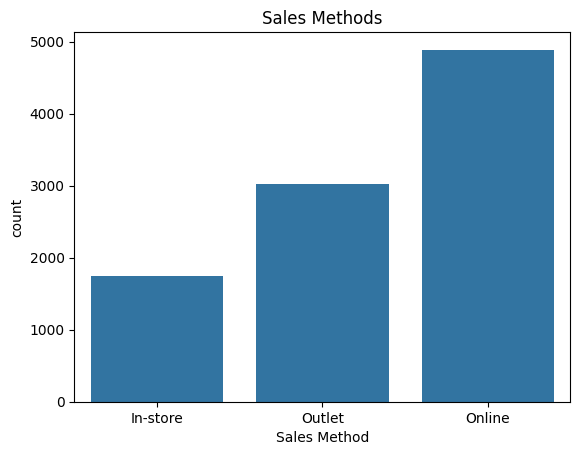

In [122]:
sns.countplot(data=data , x='Sales Method')
plt.title("Sales Methods")
plt.show()

<Axes: xlabel='Sales Method', ylabel='count'>

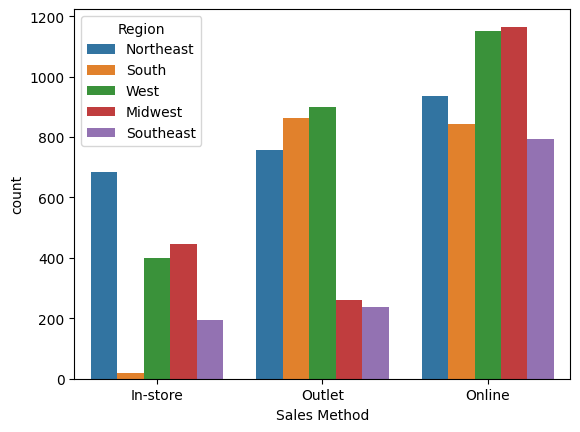

In [124]:
sns.countplot(data=data ,x='Sales Method' ,hue="Region")

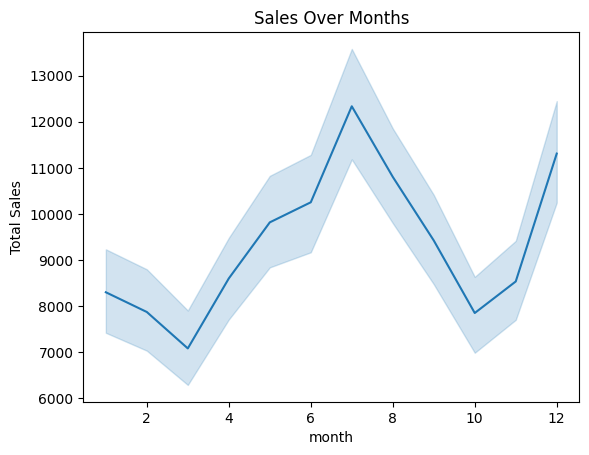

In [92]:
# Sales Over Months
sns.lineplot(x='month' ,y='Total Sales',data=data)
plt.title('Sales Over Months')
plt.show()

In [108]:
data.sample()


,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,"(Total Sales, Units Sold)",month,year
9611,Amazon,Northeast,New Hampshire,Manchester,Women's Street Footwear,39.0,113,441,154,Outlet,441,8,2021


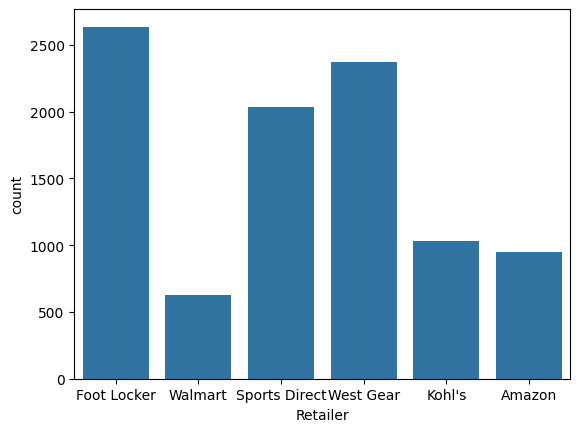

In [98]:
sns.countplot(data=data ,x="Retailer")
plt.show()

Text(0.5, 1.0, 'Count of Product per Years')

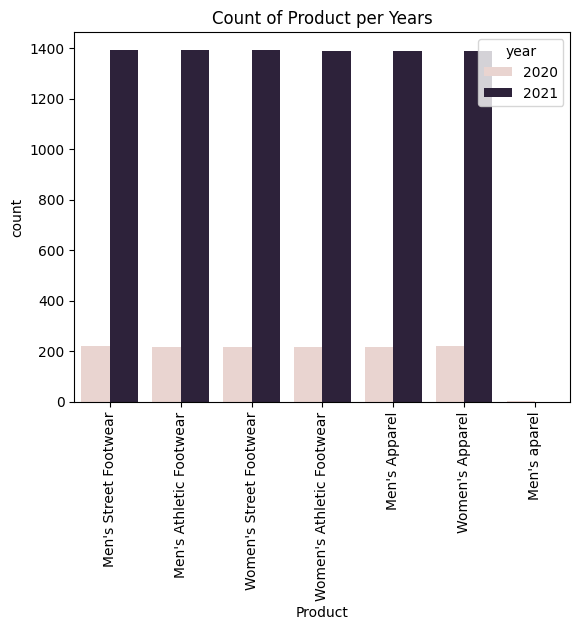

In [121]:
plt.xticks(rotation=90)
sns.countplot( data=data, x="Product" ,hue="year")
plt.title('Count of Product per Years')
